<h1><center>Lecture 13:<br>Edit Distance continued<br></center></h1><h2><center>Thursday Feb 23 2023<br></center></h2>


<center><img src="https://www.baeldung.com/wp-content/uploads/sites/4/2020/08/lev-sample-blue.png" width=800 height=800 /></center>

# Updates

### Today: Calculating minimum edit distance
* Quiz 7 due tomorrow (Friday) - Edit distance table
* HW 3 due next Tuesday

### Next week: N-gram language models

### Questions, comments, concerns?

# Moving on again: Edit Distance

## How similar are two strings? Why is this important?

## How do we define minimum edit distance?
* The **minimum** number of _editing operations_ needed to transform one into the other
* Three possible editing operations:
    * **Insertion**
        * Ex: _cat_ --> _cats_ 
    * **Deletion**
        * Ex: _cats_ --> _cat_
    * **Substitution**
        * Ex: _cat_ --> _bat_  

## Levenshtein Distance
* We can quantify the distance between two strings
    * Each operation has a cost of 1 

   * Alternatively:
        * Insertion = 1
        * Deletion = 1
        * Substitution = 2 
            * Why might substitution get a larger 'weight'?


<center><img src="https://www.baeldung.com/wp-content/uploads/sites/4/2020/08/lev-sample-blue.png" width=800 height=800 /></center>

### Some quick practice:
* Given a cost of 1 for each operation, what is the edit distance between _cats_ and _dogs_?

Edit distance = 3


* Given a cost of 2 for substitution, what is the edit distance between _walks_ and _talks_?

Edit distance = 2

### But this can get complicated!
* What about the edit distance between _kitten_ and _sitting_?
* Or _enabled_ and _embed_?

* We don't want to simply consider all possible edit paths - there's too many!
* What path should we use to get to where we want to go?

### How do we find the minimum edit distance?
1. Initial state
2. Edit operations (deletion, insertion, substitution)
3. Goal state
4. Path cost: We want to **minimalize** this!

* Possible first step in a path getting from _intention_ to _execution_
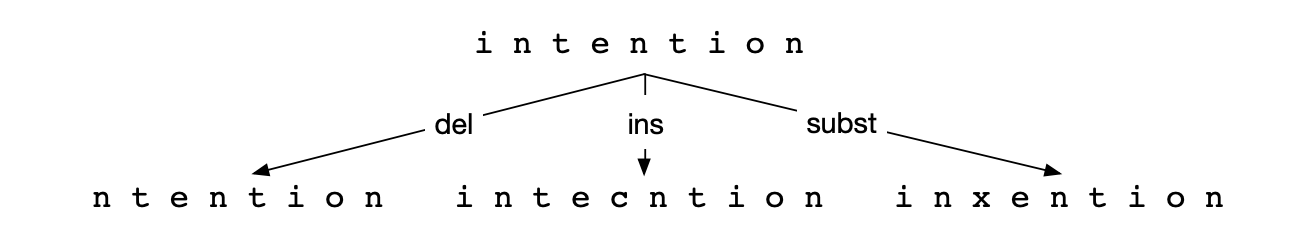

## How to compute minimum edit distance
* **Dynamic programming**: Solving problems by combining solutions to sub-problems
    * Often represented with a table of computations
    * Bottom-up computations
        * We find the edit distance of the whole string by finding the edit distances of all the smaller substrings

## So...
* Edit distance from _cats_ to _dogs_ can be found by calculating the edit distance betweeen...
    * _c_ and _d_
    * _ca_ and _d_
    * _cat_ and _d_
    * _cats_ and _d_
    * _cats_ and _do_
    * _cats_ and _dog_
    * ...and so on!

## How to compute minimum edit distance
* Levenshtein's distance formula:
    * Don't worry if this looks confusing to you! We will walk through this carefully!
    * (Note: This is for a substitution cost of 2)

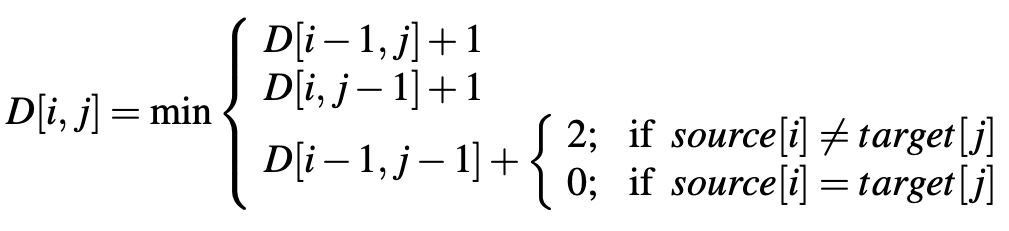

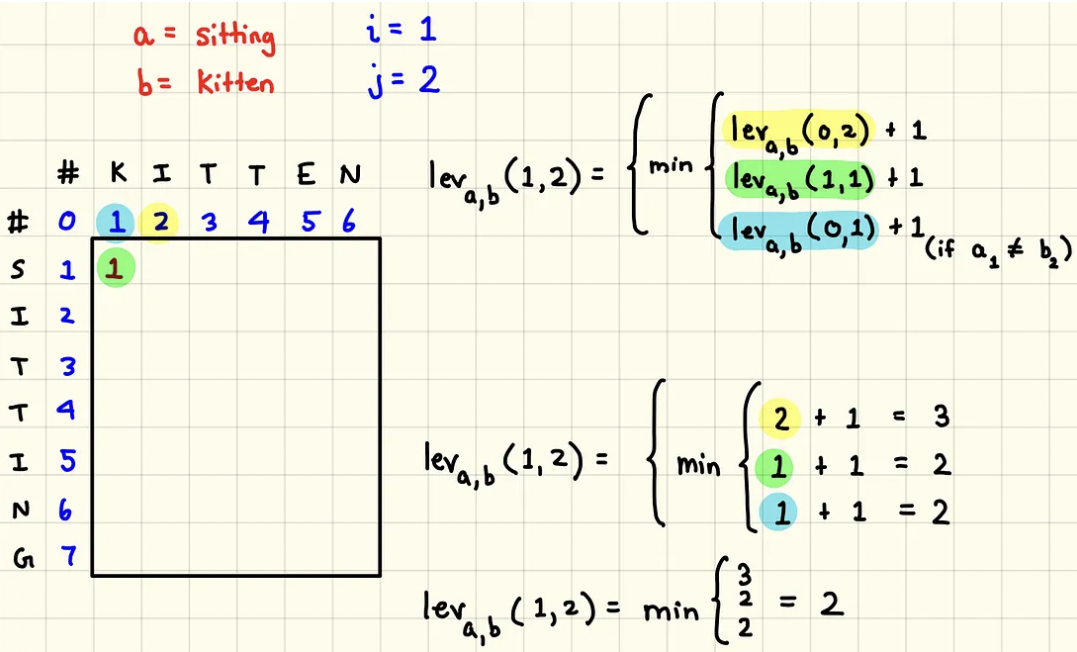

### Let's start with a short example!
* Let's get the minimum edit distance between _cat_ and _tab_
* Through intuition, we can summize that it should be 4 (given substitution cost of 1). Let's check this.

|       | **#** | **C** | **A** | **T** |
|:-----:|:-----:|:-----:|:-----:|:-----:|
| **#** |   0   |   1   |   2   |   3   |
| **T** |   1   |      |      |      |
| **A** |   2   |      |      |      |
| **B** |   3   |      |      |      |

|       | **#** | **C** | **A** | **T** |
|:-----:|:-----:|:-----:|:-----:|:-----:|
| **#** |   0   |   1   |   2   |   3   |
| **T** |   1   |   1   |      |      |
| **A** |   2   |      |      |      |
| **B** |   3   |      |      |      |

|       | **#** | **C** | **A** | **T** |
|:-----:|:-----:|:-----:|:-----:|:-----:|
| **#** |   0   |   1   |   2   |   3   |
| **T** |   1   |   1   |   2   |      |
| **A** |   2   |      |      |      |
| **B** |   3   |      |      |      |


|       | **#** | **C** | **A** | **T** |
|:-----:|:-----:|:-----:|:-----:|:-----:|
| **#** |   0   |   1   |   2   |   3   |
| **T** |   1   |   1   |   2   |   2   |
| **A** |   2   |      |      |      |
| **B** |   3   |      |      |      |


|       | **#** | **C** | **A** | **T** |
|:-----:|:-----:|:-----:|:-----:|:-----:|
| **#** |   0   |   1   |   2   |   3   |
| **T** |   1   |   1   |   2   |   2   |
| **A** |   2   |   2   |      |      |
| **B** |   3   |      |      |      |


|       | **#** | **C** | **A** | **T** |
|:-----:|:-----:|:-----:|:-----:|:-----:|
| **#** |   0   |   1   |   2   |   3   |
| **T** |   1   |   1   |   2   |   2   |
| **A** |   2   |   2   |   1   |      |
| **B** |   3   |      |      |      |


|       | **#** | **C** | **A** | **T** |
|:-----:|:-----:|:-----:|:-----:|:-----:|
| **#** |   0   |   1   |   2   |   3   |
| **T** |   1   |   1   |   2   |   2   |
| **A** |   2   |   2   |   1   |   2   |
| **B** |   3   |      |      |      |


|       | **#** | **C** | **A** | **T** |
|:-----:|:-----:|:-----:|:-----:|:-----:|
| **#** |   0   |   1   |   2   |   3   |
| **T** |   1   |   1   |   2   |   2   |
| **A** |   2   |   2   |   1   |   2   |
| **B** |   3   |   3   |      |      |


|       | **#** | **C** | **A** | **T** |
|:-----:|:-----:|:-----:|:-----:|:-----:|
| **#** |   0   |   1   |   2   |   3   |
| **T** |   1   |   1   |   2   |   2   |
| **A** |   2   |   2   |   1   |   2   |
| **B** |   3   |   3   |   2  |      |

|       | **#** | **C** | **A** | **T** |
|:-----:|:-----:|:-----:|:-----:|:-----:|
| **#** |   0   |   1   |   2   |   3   |
| **T** |   1   |   1   |   2   |   2   |
| **A** |   2   |   2   |   1   |   2   |
| **B** |   3   |   3   |   2   |   2   |

## Now try the following edit distance tables:

* This time, use a substitution cost of **2**.
   * _extend_ vs. _texting_
   * _Hyundai_ vs. _Honda_

|       | **#** | **E** | **X** | **T** | **E** | **N** | **D** |
|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|
| **#** |   0   |   1   |   2   |   3   |   4   |   5   |   6   |
| **T** |   1   |   2   |   3   |   2   |   3   |   4   |   5   |
| **E** |   2   |   1   |   2   |   3   |   2   |   3   |   4   |
| **X** |   3   |   2   |   1   |   2   |   3   |   4   |   5   |
| **T** |   4   |   3   |   2   |   1   |   2   |   3   |   4   |
| **I** |   5   |   4   |   3   |   2   |   3   |   4   |   5   |
| **N** |   6   |   5   |   4   |   3   |   4   |   3   |   4   |
| **G** |   7   |   6   |   5   |   4   |   5   |   4   |   5   |

|       | **#** | **H** | **Y** | **U** | **N** | **D** | **A** | **I** |
|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|
| **#** |   0   |   1   |   2   |   3   |   4   |   5   |   6   |   7   |
| **H** |   1   |   0   |   1   |   2   |   3   |   4   |   5   |   6   |
| **O** |   2   |   1   |   2   |   3   |   4   |   5   |   6   |   7   |
| **N** |   3   |   2   |   3   |   4   |   3   |   4   |   5   |   6   |
| **D** |   4   |   3   |   4   |   5   |   4   |   3   |   4   |   5   |
| **A** |   5   |   4   |   5   |   6   |   5   |   4   |   3   |   4   |

|       | **#** | **E** | **M** | **B** | **E** | **D** |
|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|
| **#** |   0   |   1   |   2   |   3   |   4   |   5   |
| **E** |   1   |   0   |   1   |   2   |   3   |   4   |
| **N** |   2   |   1   |   2   |   3   |   4   |   5   |
| **A** |   3   |   2   |   3   |   4   |   5   |   6   |
| **B** |   4   |   3   |   4   |   3   |   4   |   5   |
| **L** |   5   |   4   |   5   |   4   |   5   |   6   |
| **E** |   6   |   5   |   6   |   5   |   4   |   5   |
| **D** |   7   |   6   |   7   |   6   |   5   |   4   |

### Main takeaway for this class:
* You don't need to be able to code the minimum edit distance algorithm (maybe in a more advanced course)
* BUT you DO need to understand how it works!
    * i.e. You should be able to fill out an edit distance table to calculate the minimum cost

## Good news! NLTK has a built-in edit distance function!
* This is a good tool, but I still want you to know how the underlying algorithm works.
* `edit_distance(s1, s2, substitution_cost=)`

In [12]:
import nltk
nltk.edit_distance("texting", "extend", substitution_cost=1)

5

In [13]:
nltk.edit_distance("Hyundai", "Honda", substitution_cost=1)

3

In [14]:
nltk.edit_distance("Hyundai", "honda", substitution_cost=1)

4

## We can also check the edit distance between two longer strings

* Which is closer to `s1`... `s2` or `s3`?

In [ ]:
s1 = "Linguistics Society of America president Laurence Horn"
s2 = "LSA president Laurence Horn"
s3 = "President of UNC Honors Society"

In [ ]:
nltk.edit_distance(s1, s2, substitution_cost=2)

In [ ]:
nltk.edit_distance(s1, s3, substitution_cost=2)

## For each number below, which pairing has a shorter edit distance? First, make an educated guess. Then check your intuitions using the `nltk.edit_distance()` function.

1. _diver_/_digger_ vs. _diver_/_gives_
2. N.A.S.A/C.I.A vs. N.A.S.A vs. NASCAR
3. Chomsky/Dr. Noam Chomsky vs. Chomsky/Nim Chimpsky

In [11]:
print(nltk.edit_distance("diver", "digger", substitution_cost=1))
print(nltk.edit_distance("diver", "gives", substitution_cost=1))
# What happens if we change the substitution cost?

2
2


In [4]:
print(nltk.edit_distance("N.A.S.A", "C.I.A", substitution_cost=1))
print(nltk.edit_distance("N.A.S.A", "NASCAR", substitution_cost=1))

4
4


In [9]:
print(nltk.edit_distance("Chomsky", "Dr. Noam Chomsky", substitution_cost=1))
print(nltk.edit_distance("Chomsky", "Nim Chimpsky", substitution_cost=1))

9
7


## Weighted edit distance
* Sometimes, we want to consider other factors in edit distance.
    * Substitution sometimes has a higher 'weight'
    * But when else might we want to make an error more likely than other errors?
    * Hint:
    
    
<center><img src="https://preview.redd.it/dhdxxathqta71.jpg?auto=webp&s=5a3cd2506b25b15a215fb432094632e4c02805ab" width=800 height=800 /></center>

## Confusion matrix for spelling errors

* Spelling errors are not _completely_ random!
* Which errors are most likely?

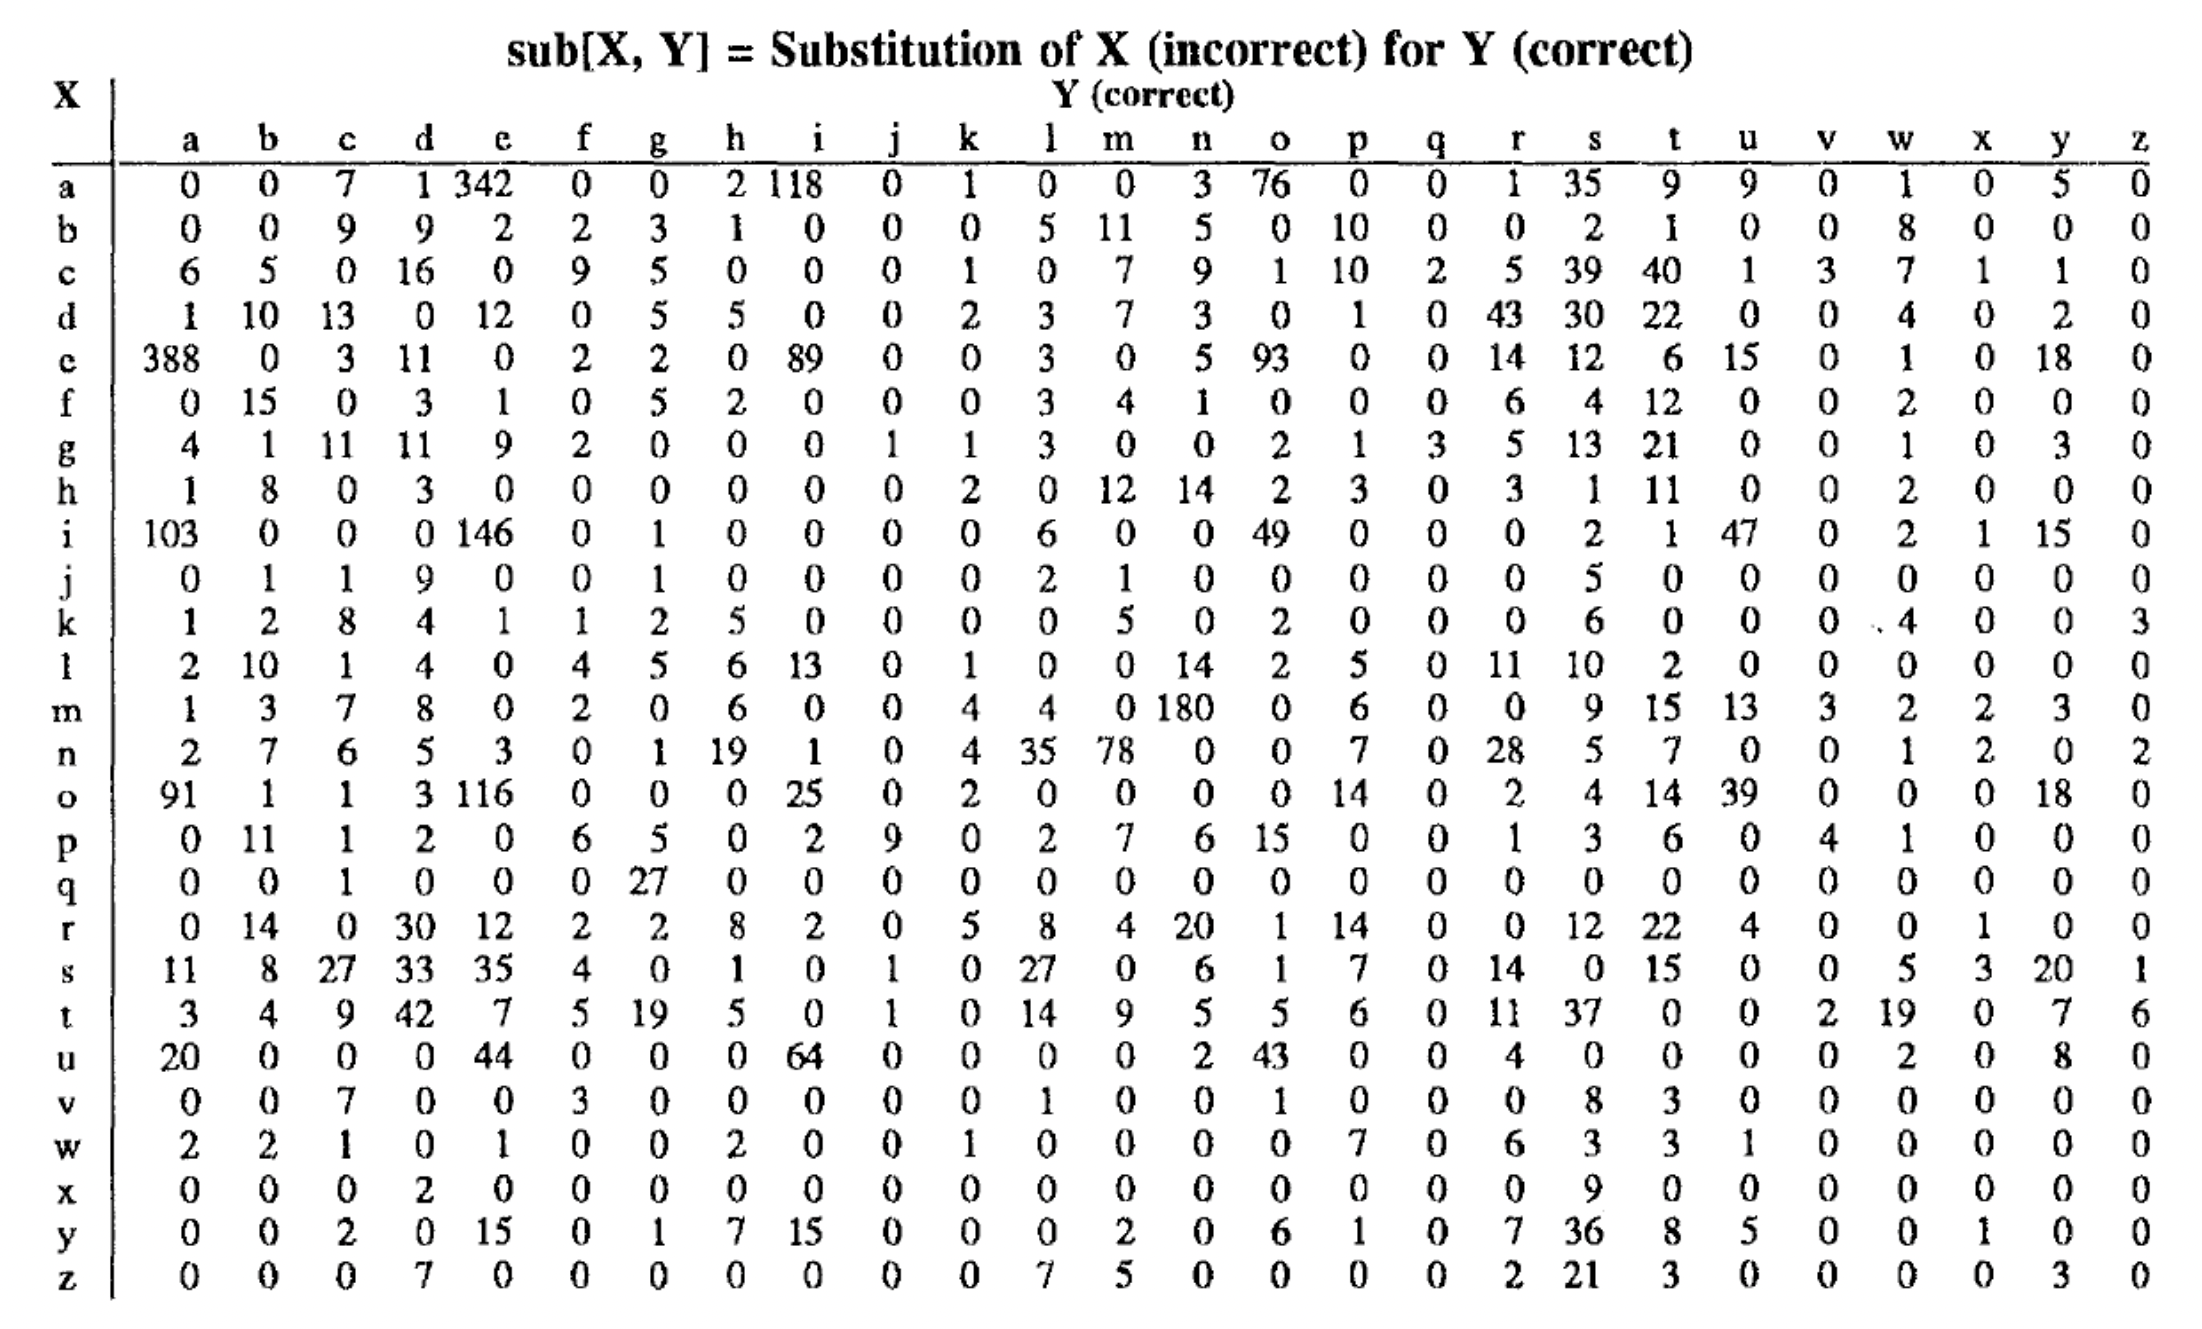

* Ex:
    * Errors are frequent between vowels
    * But we are more likely to make an error between 'a' and 'e' than 'a' and 'i'/'o'/'u'
    * Why?
    
<center><img src="https://eshop.macsales.com/blog/wp-content/uploads/2019/11/iOS13Keyboard@2x.jpg" width=800 height=800 /></center>

* We want less likely errors to have larger weights/costs.
* Spell correction should say _cot_ is a more likely error for _cut_ than it is for _cat_.
    * Same number of operations (a substitution).
    * But the likelihood of typing 'o' instead of 'u' is more likely than 'a'.
    * Error 'o' $\rightarrow$ 'a' is high
    * Error 'o' $\rightarrow$ 'a' is low

## Alignment

* Okay, we know how to get the edit distance score.
* But how do we know which edit operations to do, and in which order?
    * We can perform **backtracing**!
        * This will tell us which characters in string _a_ line up to characters in string _b_


<center><img src="https://www.baeldung.com/wp-content/uploads/sites/4/2020/08/lev-sample-blue.png" width=800 height=800 /></center>

## If this interests you...
* Possible final topic!
* Check out the **Viterbi algorithm**
    * computes the "maximum probability alignment" of one string with another

## Next week: N-grams

* Quiz 7 due tomorrow (Friday) 
* HW 3 due Tuesday
    * -20% until Thursday
